# 3 Instagram WordCloud

In [50]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from bs4 import BeautifulSoup 
from wordcloud import WordCloud, STOPWORDS
import nltk
from fbprophet import Prophet
from datetime import datetime
from collections import Counter

path = "c:/Windows/Fonts/NANUMBARUNGOTHIC.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [51]:
raw_total = pd.read_excel('../output/fresheasy/fresheasy_total_insta.xlsx', engine='openpyxl')
raw_total['tags'][:3]

0    ['#금집네-브로콜리세척하기귀찮아계속냉장고에방치해놨더니예쁜프리지아될뻔🌼먹어도갠찮겠지...
1    ['#신짱키친🎁홈파티', '#홈파티음식', '#소고기스테이크', '#쉬림프로제파스타...
2    ['#프레시지', '#밀키트', '#새우로제파스타.파스타를', '#맛쟁이_집밥', ...
Name: tags, dtype: object

In [3]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
tags_total

['#금집네-브로콜리세척하기귀찮아계속냉장고에방치해놨더니예쁜프리지아될뻔🌼먹어도갠찮겠지',
 '#눈뜨자마자빨간맛',
 '#프레시지',
 '#짬뽕순두부',
 '#계란장조림',
 '#고추부각',
 '#신짱키친🎁홈파티',
 '#홈파티음식',
 '#소고기스테이크',
 '#쉬림프로제파스타',
 '#스테이크세트',
 '#프레시지',
 '#윙잇',
 '#쿠킹박스',
 '#밀키트',
 '#크리스마스이벤트',
 '#크리스마스할인',
 '#크리스마스파티',
 '#연말파티',
 '#요리영상',
 '#요리촬영',
 '#마미스팟그릴',
 '#간편요리',
 '#간단한요리',
 '#steaks',
 '#마미스팟',
 '#프레시지',
 '#밀키트',
 '#새우로제파스타.파스타를',
 '#맛쟁이_집밥',
 '#로제파스타',
 '#파스타',
 '#파스타만들기',
 '#파스타그램..🙏🏻',
 '#프레시지',
 '#부산숙소',
 '#광안리',
 '#부산에어비앤비',
 '#광안리숙소',
 '#야경맛집',
 '#밀키트',
 '#와인',
 '#스테이크',
 '#미트파스타',
 '#감자튀김',
 '#먹스타그램',
 '#부산여행',
 '#프레시지',
 '#소불고기.오늘도',
 '#맛쟁이_집밥',
 '#삼시세끼',
 '#떡볶이',
 '#수제비떡볶이',
 '#프레시지',
 '#삼시세끼요리',
 '',
 '#프레시지',
 '#프레시지밀키트',
 '#프레시지감바스',
 '#감바스밀키트',
 '#감바스',
 '#감바스알아히요',
 '#밀키트',
 '#아메리칸미트스토리',
 '#미국산소고기',
 '#프레시지',
 '#아메리칸스테이크',
 '#미국산소고기',
 '#USMEF',
 '#아메리칸미트스토리',
 '#미국육류수출협회',
 '#스테이크',
 '#기념일',
 '#화이트데이',
 '#화이트데이이벤트',
 '#이벤트',
 '#프레시지',
 '#프레시지스테이크',
 '#화이트데이요리',
 '#기념일요리',
 '#프레시지시그니처스테이크세트',
 '#협찬',
 '#협찬',
 '#프레시지',
 '#밀키트',
 '#미싱더시티'

In [4]:
tag_counts = Counter(tags_total)

In [5]:
tag_counts.most_common(50)

[('#프레시지', 1475),
 ('#프레시지쿠킹박스', 904),
 ('#밀키트', 583),
 ('#프레시지밀키트', 548),
 ('#먹스타그램', 373),
 ('#집밥', 300),
 ('#쿠킹박스', 288),
 ('#스테이크', 270),
 ('#맛스타그램', 243),
 ('#홈쿡', 206),
 ('#요리스타그램', 200),
 ('#일상', 192),
 ('#밀푀유나베', 183),
 ('#블랙라벨스테이크', 142),
 ('#감바스', 136),
 ('#온더테이블', 122),
 ('#요리', 115),
 ('#fresheasy', 107),
 ('#미싱더시티', 104),
 ('', 97),
 ('#먹방', 97),
 ('#감바스알아히요', 96),
 ('#파스타', 89),
 ('#집밥스타그램', 88),
 ('#쿡스타그램', 83),
 ('#저녁메뉴', 80),
 ('#소통', 79),
 ('#홈파티', 74),
 ('#간편요리', 73),
 ('#좋아요', 70),
 ('#데일리', 68),
 ('#혼밥', 66),
 ('#일상스타그램', 65),
 ('#간편식', 64),
 ('#맞팔', 62),
 ('#저녁', 61),
 ('#마라탕', 60),
 ('#프레시지블랙라벨스테이크', 58),
 ('#daily', 57),
 ('#밀키트추천', 57),
 ('#내돈내산', 56),
 ('#쉬림프로제파스타', 55),
 ('#food', 55),
 ('#맛있다그램', 53),
 ('#맛집', 51),
 ('#먹스타', 51),
 ('#푸드스타그램', 50),
 ('#로제파스타', 47),
 ('#협찬', 47),
 ('#플레이팅', 47)]

In [6]:
STOPWORDS = ['#프레시지', '#fresheasy', '#프레시지밀키트', '#밀키트', '', '#프레시지쿠킹박스',
             '#맞팔', '#협찬', '#쿠킹박스', '#소통', '#좋아요반사', '#일상스타그램', '#선팔하면맞팔',
            '#선팔', '#좋반', '#일상그램', '#daily', '#데일리', '#음식', '#hi.hi.hi_mom', '#대현',
            '#먹스타맞팔', '#먹팔', '#선팔맞팔', '#일상', '#좋아요', '#럽스타그램', '#정대현', '#BAP',
            '#2in1', '#먹스타그램', '#맛스타그램']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#집밥', 300),
 ('#스테이크', 270),
 ('#홈쿡', 206),
 ('#요리스타그램', 200),
 ('#밀푀유나베', 183),
 ('#블랙라벨스테이크', 142),
 ('#감바스', 136),
 ('#온더테이블', 122),
 ('#요리', 115),
 ('#미싱더시티', 104),
 ('#먹방', 97),
 ('#감바스알아히요', 96),
 ('#파스타', 89),
 ('#집밥스타그램', 88),
 ('#쿡스타그램', 83),
 ('#저녁메뉴', 80),
 ('#홈파티', 74),
 ('#간편요리', 73),
 ('#혼밥', 66),
 ('#간편식', 64),
 ('#저녁', 61),
 ('#마라탕', 60),
 ('#프레시지블랙라벨스테이크', 58),
 ('#밀키트추천', 57),
 ('#내돈내산', 56),
 ('#쉬림프로제파스타', 55),
 ('#food', 55),
 ('#맛있다그램', 53),
 ('#맛집', 51),
 ('#먹스타', 51),
 ('#푸드스타그램', 50),
 ('#로제파스타', 47),
 ('#플레이팅', 47),
 ('#프레시지스테이크', 46),
 ('#주말', 45),
 ('#이탈리아', 44),
 ('#미싱이탈리아', 44),
 ('#foodstagram', 43),
 ('#프레시지밀푀유나베', 43),
 ('#jmt', 41),
 ('#맛있다', 40),
 ('#샤브샤브', 39),
 ('#먹방스타그램', 39),
 ('#집들이음식', 39),
 ('#찹스테이크', 37),
 ('#요리하는여자', 37),
 ('#야식', 36),
 ('#리코타치즈샐러드', 35),
 ('#존맛', 34),
 ('#시그니처스테이크', 34)]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys
from wordcloud import WordCloud
font_name = 'malgun gothic'
rc('font', family=font_name)

In [8]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

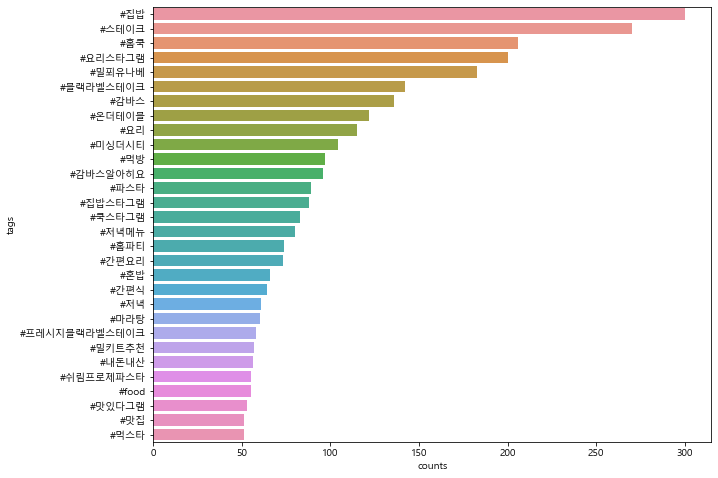

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

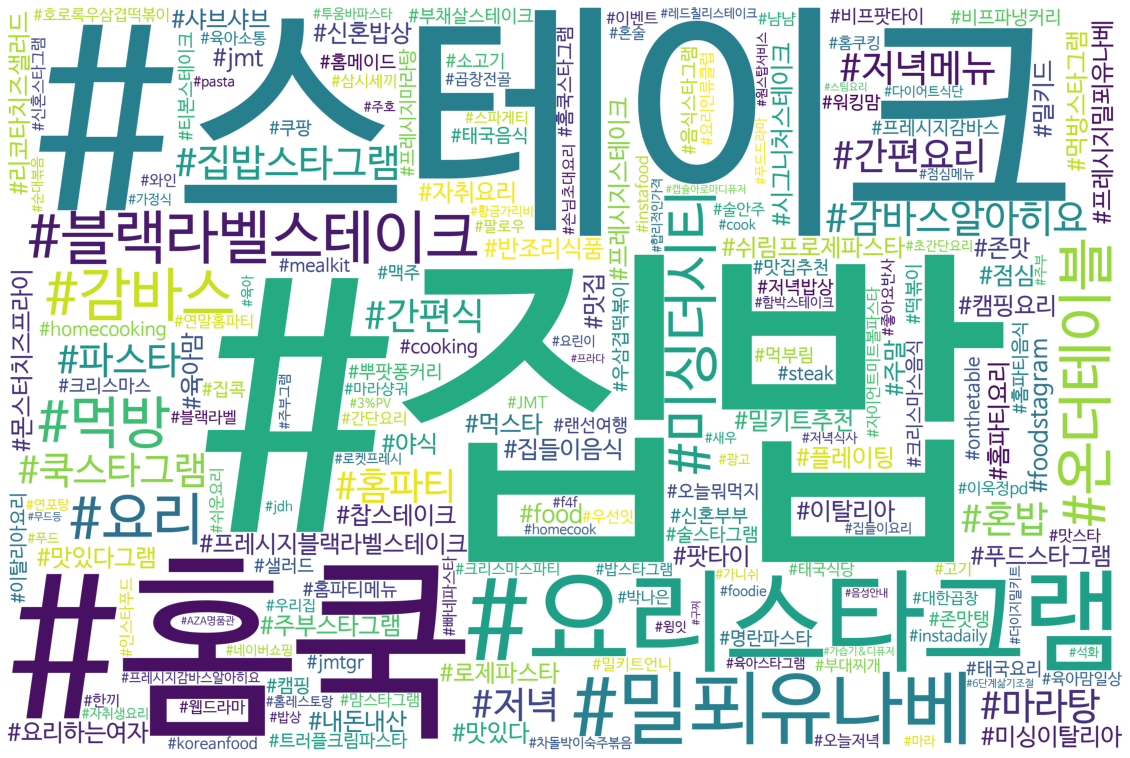

In [62]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/NANUMBARUNGOTHIC.ttf',
                     background_color='white',
                     max_words = 200,
                     relative_scaling=0.1,
                     width=3000,
                     height=2000
                     ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../../images/insta.png', dpi=400, bbox_inches='tight')
plt.show()

# Naver Cafe WordCloud

In [24]:
total_cafe = pd.read_excel('../output/fresheasy/fresheasy_total_cafe.xlsx', engine='openpyxl')

In [378]:
total_cafe.head()

,title,content,date
0,(정보)프레시지 블랙라벨 스테이크 밀키트,프레시지 블랙라벨 스테이크 밀키트 사봤어요 저는 밀키트는 첨 사본건데 이게 인...,2020.12.21.
1,국딜 프레시지 스테이크&바질빠네파스타 이거 넘 괜찮은데요.,요즘 주말에 외식도 못하니 수목요일쯤되며 이번주말 메뉴는 뭘로 준비해야하나 고...,2020.12.19.
2,"프레시지 밀키트(감바스, 밀푀유나베)",찾아보다가 프레시지 제품이 나와서 한번 구매해서 먹어봤는데 완전 맛있네용!! ...,2020.11.12.
3,위메프 프레시지 블랙라벨스테이크 샀어요,【쇼핑몰】 : 위메프 【브랜드】+【제품명】(한글로) : 프레시지 블랙라벨스테이...,2020.12.15.
4,위메프 크리스마스위크 프레시지 시카고 레드 스테이크 외 파스타...,[쇼핑몰]: 위메프 https://front.wemakeprice.com/de...,2020.12.14.


In [379]:
cafe_title= '%'.join(total_cafe['title'])
cafe_title

'(정보)프레시지 블랙라벨 스테이크 밀키트%국딜 프레시지 스테이크&바질빠네파스타 이거 넘 괜찮은데요.%프레시지 밀키트(감바스, 밀푀유나베)%위메프 프레시지 블랙라벨스테이크 샀어요%위메프 크리스마스위크 프레시지 시카고 레드 스테이크 외 파스타...%[프레시지] 경영전략그룹_경영관리실 RA 모집%혹시 프레시지 가입하신분계신가요~?%위메프 프레시지 블랙라벨 스테이크 네이버경유시 9250원, 차이결...%저녁은 국딜 프레시지 밀키트로 ..ㅋ%[캠핑음식]프레시지 밀키트 추천합니다~~%밀키트 마이세프v프레시지%저녁은 프레시지 마라탕~~~그릇이 다했네요%(음식구입) 프레시지 감바스, 파스타, 스테이크%저녁은 프레시지 스테이크랑 마이셰프 월남쌈, 김밥%프레시지 피에스타 스테이크 6,900원%<최대 10% / 투데이 특가> 프레시지 마라탕 2인분 외 BEST 밀키트%프레시지 오랜만에 세일해용%프레시지 스테이크%프레시지 마라탕%프레시지 마라탕~~~~%프레시지 스테이크와 오렌지%프레시지 매콤밀푀유나베%티구안 프레시지 화이트vs 4모션 블루%프레시지 대한곱창 곱창전골 할인하고있어요~%프레시지 떡볶이 시켰어요ㅎㅎ%[6강]\'집콕족\' 늘자 푸드테크 스타트업 뜬다…프레시지·쿠캣 급...%프레시지 블랙라벨 스테이크 밀키트%28번 (프레시지)로 요즘 살아요~%프레시지 블랙라벨 스테이크랑 로제 파스타 해봤어요%프레시지 장칼국수(2인분) 외 16종 균일가 핫딜%프레시지 스테이크세트 괜찮네요^^%점심은 프레시지 샤부샤부로%프레시지 블랙라벨 스테이크, 빠네스파게티 왔어요~%프레시지 블랙라벨 스테이크 사신분들요~ 질문있어요~%프레시지 밀푀유나베:)%11번가 프레시지 소고기 샤브샤브 2개 19600원대 무배-품절%프레시지 블랙라벨 스테이크%프레시지 특가에요!!!%[①①번가]30%할인 프레시지 모음전%프레시지 파스타 외%프레시지 2차 면접 가시는분 있으신가요!??%프레시지 순대볶음 추천해요~%[2/25 하루!] 프레시지 마라탕 9,900원 외 29종%프레시지 홈파티 주문했어요~%프레시지 몬스터 치즈 

In [380]:
from konlpy.tag import Twitter; t = Twitter()
nouns = t.nouns(cafe_title)

C:\Users\yesun\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [386]:
len(nouns)

12722

In [387]:
for i in range(len(nouns)-1):
    if len(nouns[i]) == 1:
        del nouns[i]

In [388]:
count = Counter(nouns)
count

Counter({'정보': 33,
         '프레': 956,
         '시지': 919,
         '블랙': 138,
         '라벨': 100,
         '스테이크': 340,
         '키트': 420,
         '국딜': 4,
         '바질': 5,
         '파스타': 67,
         '바스': 76,
         '밀푀유': 104,
         '위메프': 98,
         '크리스마스': 24,
         '시카고': 1,
         '레드': 12,
         '경영': 5,
         '전략': 4,
         '그룹': 2,
         '관리': 3,
         '모집': 9,
         '혹시': 11,
         '가입': 5,
         '신분': 17,
         '네이버': 6,
         '유시': 1,
         '차이': 3,
         '저녁': 81,
         '캠핑': 38,
         '음식': 89,
         '추천': 272,
         '마이': 21,
         '그릇': 3,
         '구입': 10,
         '셰프': 28,
         '월남쌈': 10,
         '김밥': 2,
         '피에스타': 16,
         '최대': 2,
         '투데이': 1,
         '인분': 60,
         '일해': 8,
         '오렌지': 1,
         '매콤': 13,
         '구안': 1,
         '화이트': 1,
         '모션': 1,
         '블루': 1,
         '곱창': 10,
         '곱창전골': 27,
         '할인': 82,
         '떡볶이': 29,
       

In [389]:
ko = nltk.Text(nouns, name = 'cafe_title')
ko.vocab()

FreqDist({'프레': 956, '시지': 919, '식품': 532, '키트': 420, '스테이크': 340, '추천': 272, '박스': 172, '쿠킹': 164, '블랙': 138, '요리': 121, ...})

In [390]:
stop_words = ['프레', '시지', '키트', '쿠킹', '박스', '국딜', '블랙', '라벨', '순위', '혹시', '인분',
             '일해', '아히', '쿠킹박스', '바스', '림프', '하나', '천마']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['정보',
 '스테이크',
 '스테이크',
 '바질',
 '파스타',
 '밀푀유',
 '위메프',
 '스테이크',
 '위메프',
 '크리스마스',
 '시카고',
 '레드',
 '스테이크',
 '파스타',
 '경영',
 '전략',
 '그룹',
 '경영',
 '관리',
 '모집',
 '가입',
 '신분',
 '위메프',
 '스테이크',
 '네이버',
 '유시',
 '차이',
 '저녁',
 '캠핑',
 '음식',
 '추천',
 '마이',
 '저녁',
 '그릇',
 '음식',
 '구입',
 '파스타',
 '스테이크',
 '저녁',
 '스테이크',
 '마이',
 '셰프',
 '월남쌈',
 '김밥',
 '피에스타',
 '스테이크',
 '최대',
 '투데이',
 '스테이크',
 '스테이크',
 '오렌지',
 '매콤',
 '밀푀유',
 '구안',
 '화이트',
 '모션',
 '블루',
 '곱창',
 '곱창전골',
 '할인',
 '떡볶이',
 '집콕족',
 '푸드',
 '테크',
 '스타트업',
 '쿠캣',
 '스테이크',
 '요즘',
 '스테이크',
 '로제',
 '파스타',
 '칼국수',
 '균일',
 '핫딜',
 '스테이크',
 '세트',
 '점심',
 '샤부샤부',
 '스테이크',
 '스파게티',
 '스테이크',
 '사신',
 '질문',
 '밀푀유',
 '번가',
 '소고기',
 '샤브샤브',
 '무배',
 '품절',
 '스테이크',
 '특가',
 '번가',
 '할인',
 '파스타',
 '면접',
 '가요',
 '순대볶음',
 '추천',
 '하루',
 '홈파티',
 '주문',
 '몬스터',
 '치즈',
 '프라이',
 '마라샹궈',
 '스테이크',
 '핫딜',
 '이용',
 '보신',
 '티몬',
 '핫딜',
 '심플',
 '리쿡',
 '번길',
 '구매',
 '추천',
 '미리',
 '크리스마스',
 '홈파티',
 '오늘',
 '하루',
 '연말',
 '파티',
 '준비',
 '국쇼',
 '스테이크',
 '행사',
 '곱창전골',
 '샤브샤브',
 '품절',
 '부

In [391]:
ko = nltk.Text(ko)
vocab = ko.vocab().most_common(300)
vocab
len(vocab)

300

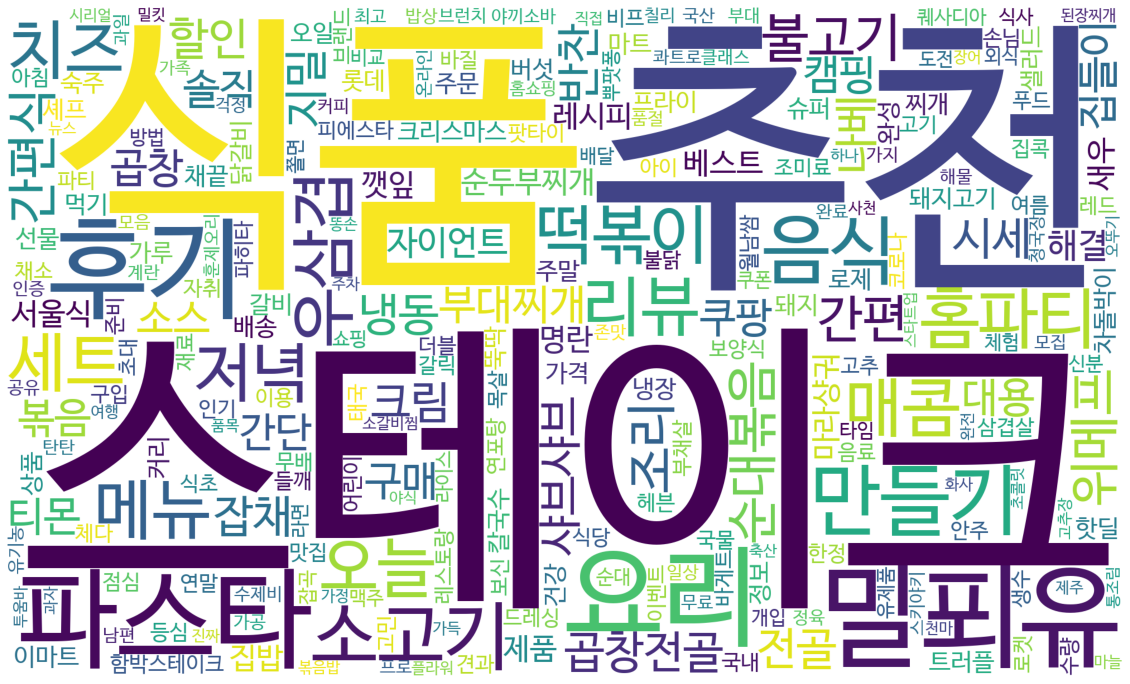

In [44]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/NANUMBARUNGOTHIC.ttf',
                     background_color='white',
                     max_words = 250,
                     relative_scaling=0.1,
                     width=700,
                     height=450
                     ).generate_from_frequencies(dict(vocab))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.savefig('../images/wordcloud_cafe.png')

In [427]:
total_cafe = pd.read_excel('../output/fresheasy/fresheasy_total_cafe.xlsx', engine='openpyxl')
total_blog = pd.read_excel('../output/fresheasy/fresheasy_total_blog.xlsx', engine='openpyxl')

In [428]:
total_naver = pd.concat([total_cafe, total_blog])
total_naver.reset_index(inplace=True, drop=True)
total_naver.tail()

,title,content,date
5477,쿠킹박스 장어덮밥 만들기,"오늘은 프레시지 쿠킹박스 덕분에 "" 장어덮밥 "" 입니다 한그릇에 정성과 사랑을...",2016.10.29.
5478,프레시지 밀푀유나베 무쌈말이 아워홈 처럼 간편해,때로는 간편하지만 우아하게 ♪ 프레시지 쿠킹박스로 밀푀유나베 무쌈말이 만들기 ...,2017.09.11.
5479,집들이음식 무쌈말이 강추해요~ ⓦFresh Easy 쿠킹박스,바로 프레시지 쿠킹박스를 알게되었으니까요^^ 쿠킹박스 하나면 소스 준비는......,2017.06.19.
5480,프레시지 반조리식품 와사비마요 새우튀김,그동안 프레시지 반조리식품 쿠킹박스 주문해서 먹은것들 다 정말정말 맛있고......,2016.07.26.
5481,프레시지 채끝등심 찹스테이크:넘나 만들기쉬운것,매일매일 똑같은반찬 똑같은식단에 질릴때쯤만난 프레시지 쿠킹박스 이웃님을통해 알...,2016.11.03.


In [473]:
total_naver.to_excel('../data/fresheasy/total_naver.xlsx')

In [21]:
total_naver.tail()

,title,content,date
5477,쿠킹박스 장어덮밥 만들기,"오늘은 프레시지 쿠킹박스 덕분에 "" 장어덮밥 "" 입니다 한그릇에 정성과 사랑을...",2016.10.29.
5478,프레시지 밀푀유나베 무쌈말이 아워홈 처럼 간편해,때로는 간편하지만 우아하게 ♪ 프레시지 쿠킹박스로 밀푀유나베 무쌈말이 만들기 ...,2017.09.11.
5479,집들이음식 무쌈말이 강추해요~ ⓦFresh Easy 쿠킹박스,바로 프레시지 쿠킹박스를 알게되었으니까요^^ 쿠킹박스 하나면 소스 준비는......,2017.06.19.
5480,프레시지 반조리식품 와사비마요 새우튀김,그동안 프레시지 반조리식품 쿠킹박스 주문해서 먹은것들 다 정말정말 맛있고......,2016.07.26.
5481,프레시지 채끝등심 찹스테이크:넘나 만들기쉬운것,매일매일 똑같은반찬 똑같은식단에 질릴때쯤만난 프레시지 쿠킹박스 이웃님을통해 알...,2016.11.03.


In [22]:
total_naver.drop_duplicates(subset=['content'], inplace=True)
total_naver.reset_index(inplace=True, drop=True)
total_naver.tail()

,title,content,date
5477,쿠킹박스 장어덮밥 만들기,"오늘은 프레시지 쿠킹박스 덕분에 "" 장어덮밥 "" 입니다 한그릇에 정성과 사랑을...",2016.10.29.
5478,프레시지 밀푀유나베 무쌈말이 아워홈 처럼 간편해,때로는 간편하지만 우아하게 ♪ 프레시지 쿠킹박스로 밀푀유나베 무쌈말이 만들기 ...,2017.09.11.
5479,집들이음식 무쌈말이 강추해요~ ⓦFresh Easy 쿠킹박스,바로 프레시지 쿠킹박스를 알게되었으니까요^^ 쿠킹박스 하나면 소스 준비는......,2017.06.19.
5480,프레시지 반조리식품 와사비마요 새우튀김,그동안 프레시지 반조리식품 쿠킹박스 주문해서 먹은것들 다 정말정말 맛있고......,2016.07.26.
5481,프레시지 채끝등심 찹스테이크:넘나 만들기쉬운것,매일매일 똑같은반찬 똑같은식단에 질릴때쯤만난 프레시지 쿠킹박스 이웃님을통해 알...,2016.11.03.


In [23]:
title= '%'.join(total_naver['title'])
title

'(정보)프레시지 블랙라벨 스테이크 밀키트%국딜 프레시지 스테이크&바질빠네파스타 이거 넘 괜찮은데요.%프레시지 밀키트(감바스, 밀푀유나베)%위메프 프레시지 블랙라벨스테이크 샀어요%위메프 크리스마스위크 프레시지 시카고 레드 스테이크 외 파스타...%[프레시지] 경영전략그룹_경영관리실 RA 모집%혹시 프레시지 가입하신분계신가요~?%위메프 프레시지 블랙라벨 스테이크 네이버경유시 9250원, 차이결...%저녁은 국딜 프레시지 밀키트로 ..ㅋ%[캠핑음식]프레시지 밀키트 추천합니다~~%밀키트 마이세프v프레시지%저녁은 프레시지 마라탕~~~그릇이 다했네요%(음식구입) 프레시지 감바스, 파스타, 스테이크%저녁은 프레시지 스테이크랑 마이셰프 월남쌈, 김밥%프레시지 피에스타 스테이크 6,900원%<최대 10% / 투데이 특가> 프레시지 마라탕 2인분 외 BEST 밀키트%프레시지 오랜만에 세일해용%프레시지 스테이크%프레시지 마라탕%프레시지 마라탕~~~~%프레시지 스테이크와 오렌지%프레시지 매콤밀푀유나베%티구안 프레시지 화이트vs 4모션 블루%프레시지 대한곱창 곱창전골 할인하고있어요~%프레시지 떡볶이 시켰어요ㅎㅎ%[6강]\'집콕족\' 늘자 푸드테크 스타트업 뜬다…프레시지·쿠캣 급...%프레시지 블랙라벨 스테이크 밀키트%28번 (프레시지)로 요즘 살아요~%프레시지 블랙라벨 스테이크랑 로제 파스타 해봤어요%프레시지 장칼국수(2인분) 외 16종 균일가 핫딜%프레시지 스테이크세트 괜찮네요^^%점심은 프레시지 샤부샤부로%프레시지 블랙라벨 스테이크, 빠네스파게티 왔어요~%프레시지 블랙라벨 스테이크 사신분들요~ 질문있어요~%프레시지 밀푀유나베:)%11번가 프레시지 소고기 샤브샤브 2개 19600원대 무배-품절%프레시지 블랙라벨 스테이크%프레시지 특가에요!!!%[①①번가]30%할인 프레시지 모음전%프레시지 파스타 외%프레시지 2차 면접 가시는분 있으신가요!??%프레시지 순대볶음 추천해요~%[2/25 하루!] 프레시지 마라탕 9,900원 외 29종%프레시지 홈파티 주문했어요~%프레시지 몬스터 치즈 

In [24]:
from konlpy.tag import Twitter; t = Twitter()
nouns = t.nouns(title)

C:\Users\yesun\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [28]:
for i in range(len(nouns)-1):
    if len(nouns[i]) == 1:
        del nouns[i]

In [29]:
len(nouns)

31757

In [30]:
count = Counter(nouns)
count

Counter({'정보': 36,
         '프레': 3820,
         '시지': 3608,
         '블랙': 357,
         '라벨': 269,
         '스테이크': 848,
         '키트': 1888,
         '국딜': 4,
         '바질': 28,
         '파스타': 343,
         '바스': 274,
         '밀푀유': 446,
         '위메프': 108,
         '크리스마스': 48,
         '시카고': 4,
         '레드': 26,
         '경영': 5,
         '전략': 4,
         '그룹': 2,
         '관리': 3,
         '모집': 15,
         '혹시': 11,
         '가입': 6,
         '신분': 17,
         '네이버': 10,
         '유시': 1,
         '차이': 3,
         '저녁': 134,
         '캠핑': 60,
         '음식': 194,
         '추천': 485,
         '마이': 28,
         '그릇': 4,
         '구입': 24,
         '셰프': 43,
         '월남쌈': 21,
         '김밥': 4,
         '피에스타': 29,
         '최대': 3,
         '투데이': 1,
         '인분': 92,
         '일해': 8,
         '오렌지': 1,
         '매콤': 127,
         '구안': 1,
         '화이트': 1,
         '모션': 1,
         '블루': 1,
         '곱창': 59,
         '곱창전골': 95,
         '할인': 92,
         '떡볶이':

In [31]:
ko = nltk.Text(nouns, name = 'title')
ko.vocab()

FreqDist({'프레': 3820, '시지': 3608, '키트': 1888, '박스': 1013, '쿠킹': 958, '스테이크': 848, '식품': 561, '추천': 485, '밀푀유': 446, '후기': 367, ...})

In [32]:
stop_words = ['프레', '시지', '키트', '쿠킹', '박스', '국딜', '블랙', '라벨', '순위', '혹시', '인분',
             '일해', '아히', '쿠킹박스', '바스', '림프', '마이', '어디', '자주', '이의', '확인',
             '정말', '요미', '루데', '가성', '역시', '카프레', '번가', '요즘', '고지키', '핑크',
             '목록', '리스트', '우리', '스테이', '기사', '지쿠', '어른', '약수동', '행사', '페이트', '해먹',
              '분유', '기업', '데이', '나이트', '산촌', '아이스크림', '몬스터', '토제']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['정보',
 '스테이크',
 '스테이크',
 '바질',
 '파스타',
 '밀푀유',
 '위메프',
 '스테이크',
 '위메프',
 '크리스마스',
 '시카고',
 '레드',
 '스테이크',
 '파스타',
 '경영',
 '전략',
 '그룹',
 '경영',
 '관리',
 '모집',
 '가입',
 '신분',
 '위메프',
 '스테이크',
 '네이버',
 '유시',
 '차이',
 '저녁',
 '캠핑',
 '음식',
 '추천',
 '저녁',
 '그릇',
 '음식',
 '구입',
 '파스타',
 '스테이크',
 '저녁',
 '스테이크',
 '셰프',
 '월남쌈',
 '김밥',
 '피에스타',
 '스테이크',
 '최대',
 '투데이',
 '스테이크',
 '스테이크',
 '오렌지',
 '매콤',
 '밀푀유',
 '구안',
 '화이트',
 '모션',
 '블루',
 '곱창',
 '곱창전골',
 '할인',
 '떡볶이',
 '집콕족',
 '푸드',
 '테크',
 '스타트업',
 '쿠캣',
 '스테이크',
 '스테이크',
 '로제',
 '파스타',
 '칼국수',
 '균일',
 '핫딜',
 '스테이크',
 '세트',
 '점심',
 '샤부샤부',
 '스테이크',
 '스파게티',
 '스테이크',
 '사신',
 '질문',
 '밀푀유',
 '소고기',
 '샤브샤브',
 '무배',
 '품절',
 '스테이크',
 '특가',
 '할인',
 '파스타',
 '면접',
 '가요',
 '순대볶음',
 '추천',
 '하루',
 '홈파티',
 '주문',
 '치즈',
 '프라이',
 '천마',
 '마라샹궈',
 '스테이크',
 '핫딜',
 '이용',
 '보신',
 '티몬',
 '핫딜',
 '심플',
 '리쿡',
 '번길',
 '구매',
 '추천',
 '미리',
 '크리스마스',
 '홈파티',
 '오늘',
 '하루',
 '연말',
 '파티',
 '준비',
 '국쇼',
 '스테이크',
 '곱창전골',
 '샤브샤브',
 '품절',
 '부대찌개',
 '공유',
 '조리',
 '식품',
 '신제품',
 '크리스마스'

In [33]:
ko = nltk.Text(ko)
vocab = ko.vocab().most_common(300)
vocab

[('스테이크', 848),
 ('식품', 561),
 ('추천', 485),
 ('밀푀유', 446),
 ('후기', 367),
 ('요리', 357),
 ('파스타', 343),
 ('만들기', 337),
 ('음식', 194),
 ('소고기', 191),
 ('홈파티', 159),
 ('우삼겹', 155),
 ('리뷰', 146),
 ('메뉴', 145),
 ('떡볶이', 137),
 ('세트', 135),
 ('저녁', 134),
 ('매콤', 127),
 ('오늘', 125),
 ('치즈', 124),
 ('불고기', 116),
 ('위메프', 108),
 ('조리', 107),
 ('간편식', 100),
 ('간편', 98),
 ('순대볶음', 96),
 ('곱창전골', 95),
 ('반찬', 94),
 ('시세', 93),
 ('할인', 92),
 ('샤브샤브', 92),
 ('냉동', 92),
 ('잡채', 88),
 ('크림', 86),
 ('지밀', 82),
 ('나베', 81),
 ('전골', 80),
 ('부대찌개', 79),
 ('구매', 77),
 ('소스', 77),
 ('쿠팡', 70),
 ('간단', 70),
 ('집들이', 69),
 ('볶음', 67),
 ('티몬', 66),
 ('대용', 64),
 ('솔직', 63),
 ('캠핑', 60),
 ('곱창', 59),
 ('자이언트', 59),
 ('해결', 57),
 ('순두부찌개', 57),
 ('베스트', 54),
 ('깻잎', 54),
 ('명란', 53),
 ('제품', 53),
 ('레시피', 53),
 ('집밥', 52),
 ('서울식', 50),
 ('마라샹궈', 49),
 ('새우', 49),
 ('크리스마스', 48),
 ('롯데', 48),
 ('마트', 47),
 ('커리', 47),
 ('완성', 47),
 ('상품', 45),
 ('칼국수', 44),
 ('주문', 44),
 ('샐러드', 44),
 ('셰프', 43),
 ('오일', 43),
 ('트

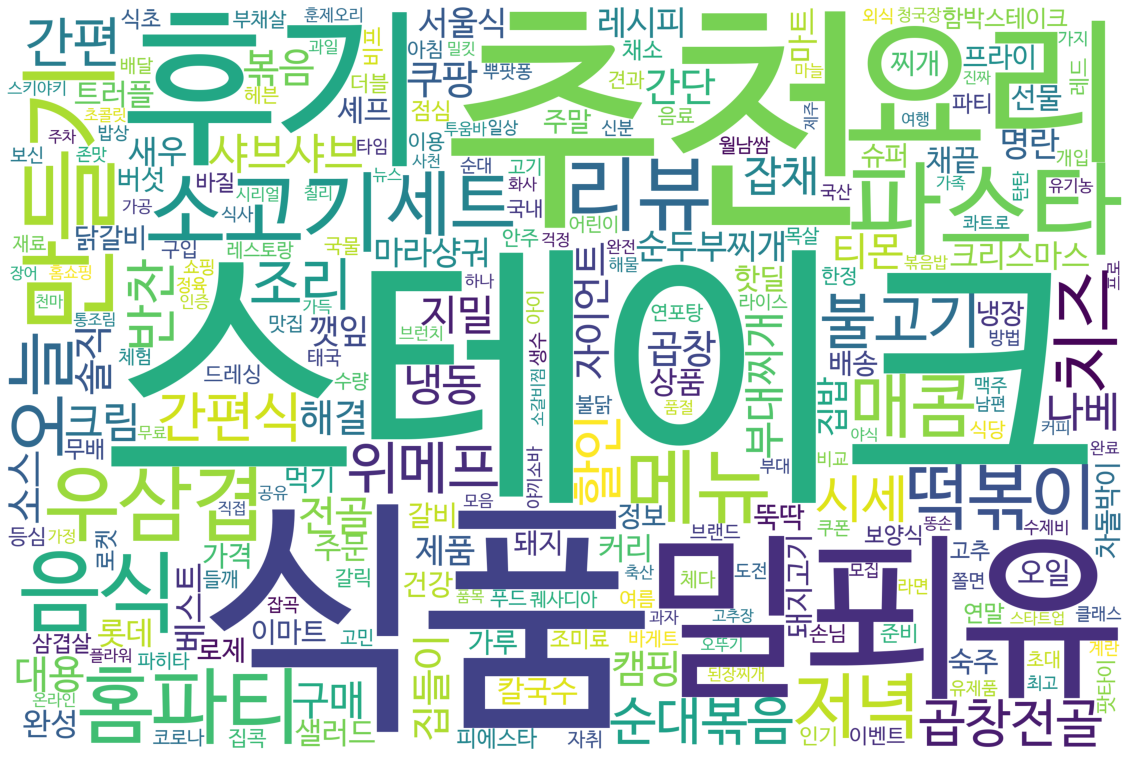

In [60]:
wordcloud = WordCloud(font_path=path,
                     background_color='white',
                     max_words = 250,
                     relative_scaling=0.3,
                     width=3000,
                     height=2000
                     ).generate_from_frequencies(dict(vocab))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('../../images/naver_400dpi.png', dpi=400, bbox_inches='tight')
plt.savefig('../../images/naver.png', dpi = 400, bbox_inches='tight')
plt.show()

In [474]:
fresheasy = total_naver['content'].str.contains('쓰레기')
fresh_count = total_naver[fresheasy]
len(fresh_count)

22

In [475]:
len(fresh_count)/len(total_naver['content'])

5482

In [476]:
22/5482

0.004013133892739876

# "프레시지+쓰레기", "프레시지+포장" WordCloud

In [482]:
pack = pd.read_excel('../output/fresheasy/fresheasy_pack_naver.xlsx', engine='openpyxl', index_col = 0)
trash = pd.read_excel('../output/fresheasy/fresheasy_trash_naver.xlsx', engine='openpyxl', index_col = 0)

In [484]:
pack_trash = pd.concat([pack, trash])
pack_trash.drop_duplicates(subset=['content'], inplace=True)
pack_trash.reset_index(inplace=True, drop=True)
pack_trash.tail()

,content,date,title
2770,프레시지로 기념일요리 뽑낼수 있어서 다행이었어요 ^^ 휘리릭 만들면 금방 그럴...,2016.07.11.,프레시지로 기념일요리 깔끔하게 완성이요~
2771,음식물쓰레기가 없어 편해요. 손님초대할때나 기념일같은 특별한날에 프레시지 쿠킹...,2016.07.09.,오늘뭐먹지 ? 프레시지 핑크소스 새우커리와 갈릭바게트로 결정~...
2772,건 프레시지인거 같아요. 개인적으로 반조리 보다는 재료가 도착하면 직접 만드는...,2017.01.19.,쿠킹박스 도움받는 겨울방학이예요.
2773,밀키트 프레시지 공장 방문 ● 올해 공공와이파이 1만개 구축 본격화…11월 초...,2020.09.11.,장 마감 주요 이슈와 뉴스
2774,키워드 : DCM벤처 / 설문조사 / 인사관리 https://www.thebe...,2020.12.02.,2020년 12월 2일 수요일 신문브리핑


In [488]:
pack_trash.dropna(inplace=True)

In [489]:
title= '%'.join(pack_trash['title'])
title

'뿌팟퐁커리 프레시지 밀키트 추천%프레시지 밀푀유나베 : 두 번 해봤는데%홈파티 요리 스테이크와 파스타 프레시지 밀키트로!%제대로 된 분리수거를 위해서 (feat. 프레시지 밀키트)%프레시지밀키트로 연말에 홈파티 준비하세요%프레시지 스테이크 청국장 내돈내산 밀키트후기%밀키트 프레시지 쉬림프 로제파스타 훌륭한 한 끼!%내돈내산 프레시지 블랙라벨스테이크 집에서도 분위기있게:)%★프레시지 소고기 찹스테이크 만들기- 요리에 자신감이 뿜뿜%[프레시지 밀키트] 가성비 지대로 스테이크 등장!%프레시지 빠네 파스타 추천!!%마라샹궈 프레시지 15분이면 완성되는 쿠킹박스%프레시지 매콤밀푀유나베 밀키트 괜찮네요!%프레시지 밀키트 스테이크&파스타 만들어봤어요.%프레시지 밀키트 (스테이크, 감바스, 파스타)%프레시지 블랙라벨 스테이크 후기-%내돈주고 사먹는 후기쓰 프레시지 블랙라벨 스테이크 정말 맛있댜%프레시지 밀키트로 할로윈 캠핑 대저캠핑장 A구역 끼리캠핑4%프레시지 소고기 야끼소바, 신선하고 맛있음%밀키트 추천/ 프레시지 마라탕%프레시지 소고기 샤브샤브 + 우동%[프레시지 밀키트] 자이언트 부대찌개 요리의 신세계%집에서도 스테이크 전문점 못지 않게 ‘프레시지 스테이크... %프레시지 매콤 깻잎 순대볶음, 내돈내산 솔직후기%프레시지홈파티세트 스테이크 집에서 해먹기 블랙라벨스테이크%곱창전골밀키트 프레시지 대한곱창 곱창전골 집에서 편하게... %프레시지 마라탕 밀키트 쉽고 간편하게!%프레시지 밀푀유나베 밀키트로 저녁메뉴 해결%초간단 집들이 요리. 프레시지 더큰 밀푀유 나베로 만들어봄%[밀키트] 손쉽게 밀푀유나베 - \'프레시지\' 밀키트%감바스 알 하이요 집에서 쉽게 만들기,프레시지 감바스 알... %밀키트 추천 간단하게 끓여먹는 프레시지 돼지고기 고추장찌개%카톡딜로 구매한 프레시지 밀푀유나베 밀키트%프레시지 마라탕 밀키트로 홈메이드 마라탕 도전%염정아 & 정우성 삼시세끼 수제비떡볶이 간편하게 프레시지로... %프레시지 감바스 알 아히요 만들기, 간편함, 신선함, 맛있음%[홈쿡]채끝

In [490]:
from konlpy.tag import Twitter; t = Twitter()
nouns = t.nouns(title)

C:\Users\yesun\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [494]:
for i in range(len(nouns)-1):
    if len(nouns[i]) == 1:
        del nouns[i]

In [495]:
len(nouns)

4534

In [496]:
count = Counter(nouns)
count

Counter({'뿌팟퐁': 1,
         '커리': 11,
         '프레': 417,
         '시지': 390,
         '키트': 158,
         '추천': 44,
         '밀푀유': 70,
         '홈파티': 20,
         '요리': 67,
         '스테이크': 112,
         '파스타': 36,
         '제대로': 2,
         '분리수거': 1,
         '위해': 1,
         '지밀': 8,
         '연말': 9,
         '준비': 5,
         '청국장': 1,
         '후기': 65,
         '림프': 11,
         '블랙': 50,
         '분위기': 3,
         '소고기': 25,
         '만들기': 45,
         '자신감': 2,
         '뿜뿜': 1,
         '가성': 2,
         '지대': 1,
         '등장': 1,
         '마라샹궈': 4,
         '완성': 5,
         '쿠킹': 83,
         '박스': 88,
         '매콤': 16,
         '바스': 23,
         '라벨': 30,
         '정말': 4,
         '맛있댜': 1,
         '할로윈': 1,
         '캠핑': 26,
         '캠핑장': 31,
         '구역': 2,
         '끼리': 1,
         '야끼소바': 3,
         '샤브샤브': 7,
         '우동': 1,
         '자이언트': 4,
         '부대찌개': 7,
         '신세계': 3,
         '전문점': 1,
         '깻잎': 5,
         '순대볶음': 8,
       

In [497]:
ko = nltk.Text(nouns, name = 'title')
ko.vocab()

FreqDist({'프레': 417, '시지': 390, '키트': 158, '스테이크': 112, '박스': 88, '쿠킹': 83, '밀푀유': 70, '요리': 67, '후기': 65, '블랙': 50, ...})

In [501]:
stop_words = ['프레', '시지', '키트', '추천', '위해', '제대로', '지밀', '쿠킹', '정말', '라벨', '메이드',
             '일해', '아히', '쿠킹박스', '바스', '어른', '실리콘', '시세', '이제', '요즘']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['뿌팟퐁',
 '커리',
 '밀푀유',
 '홈파티',
 '요리',
 '스테이크',
 '파스타',
 '분리수거',
 '연말',
 '홈파티',
 '준비',
 '스테이크',
 '청국장',
 '후기',
 '림프',
 '파스타',
 '블랙',
 '스테이크',
 '분위기',
 '소고기',
 '스테이크',
 '만들기',
 '요리',
 '자신감',
 '뿜뿜',
 '가성',
 '지대',
 '스테이크',
 '등장',
 '파스타',
 '마라샹궈',
 '완성',
 '박스',
 '매콤',
 '밀푀유',
 '스테이크',
 '파스타',
 '스테이크',
 '파스타',
 '블랙',
 '스테이크',
 '후기',
 '후기',
 '블랙',
 '스테이크',
 '맛있댜',
 '할로윈',
 '캠핑',
 '캠핑장',
 '구역',
 '끼리',
 '캠핑',
 '소고기',
 '야끼소바',
 '소고기',
 '샤브샤브',
 '우동',
 '자이언트',
 '부대찌개',
 '요리',
 '신세계',
 '스테이크',
 '전문점',
 '스테이크',
 '매콤',
 '깻잎',
 '순대볶음',
 '솔직',
 '후기',
 '홈파티',
 '세트',
 '스테이크',
 '먹기',
 '블랙',
 '스테이크',
 '곱창전골',
 '곱창',
 '곱창전골',
 '밀푀유',
 '저녁',
 '메뉴',
 '해결',
 '간단',
 '집들이',
 '요리',
 '밀푀유',
 '나베',
 '밀푀유',
 '하이',
 '만들기',
 '돼지고기',
 '고추장',
 '찌개',
 '카톡',
 '딜로',
 '구매',
 '밀푀유',
 '도전',
 '염정아',
 '정우성',
 '수제비',
 '떡볶이',
 '만들기',
 '홈쿡',
 '채끝',
 '짜퐈',
 '구리',
 '솔직',
 '후기',
 '소고기',
 '샤브샤브',
 '밀푀유',
 '해먹',
 '체험',
 '요리',
 '조리',
 '식품',
 '박스',
 '밀푀유',
 '만들기',
 '요리',
 '워킹맘',
 '밀푀유',
 '비상식량',
 '소고기',
 '샤브샤브',
 '림프',
 '로제',
 '파스타',
 '

In [502]:
ko = nltk.Text(ko)
vocab = ko.vocab().most_common(300)
vocab

[('스테이크', 112),
 ('박스', 88),
 ('밀푀유', 70),
 ('요리', 67),
 ('후기', 65),
 ('블랙', 50),
 ('만들기', 45),
 ('파스타', 36),
 ('캠핑장', 31),
 ('세트', 30),
 ('일상', 29),
 ('캠핑', 26),
 ('메뉴', 26),
 ('음식', 26),
 ('소고기', 25),
 ('오늘', 23),
 ('저녁', 21),
 ('홈파티', 20),
 ('떡볶이', 19),
 ('조리', 19),
 ('식품', 19),
 ('레시피', 19),
 ('우삼겹', 18),
 ('리뷰', 17),
 ('매콤', 16),
 ('집밥', 15),
 ('구매', 14),
 ('불고기', 14),
 ('배송', 14),
 ('솔직', 13),
 ('집들이', 13),
 ('쿠팡', 13),
 ('잡채', 13),
 ('셰프', 13),
 ('나베', 12),
 ('전골', 12),
 ('볶음', 12),
 ('마켓', 12),
 ('펜션', 12),
 ('커리', 11),
 ('림프', 11),
 ('샐러드', 11),
 ('방송', 11),
 ('여행', 11),
 ('베스트', 11),
 ('버섯', 10),
 ('로켓', 10),
 ('일기', 10),
 ('연말', 9),
 ('로제', 9),
 ('뚝딱', 9),
 ('마트', 9),
 ('주말', 9),
 ('소스', 9),
 ('상품', 9),
 ('티몬', 9),
 ('트러플', 9),
 ('간편식', 9),
 ('심플', 9),
 ('마이', 9),
 ('순대볶음', 8),
 ('먹기', 8),
 ('도전', 8),
 ('크리스마스', 8),
 ('크림', 8),
 ('새우', 8),
 ('서울식', 8),
 ('치즈', 8),
 ('새벽', 8),
 ('간편', 8),
 ('리쿡', 8),
 ('키친', 8),
 ('약수동', 8),
 ('위메프', 8),
 ('샤브샤브', 7),
 ('부대찌개', 7),
 ('해결', 7)

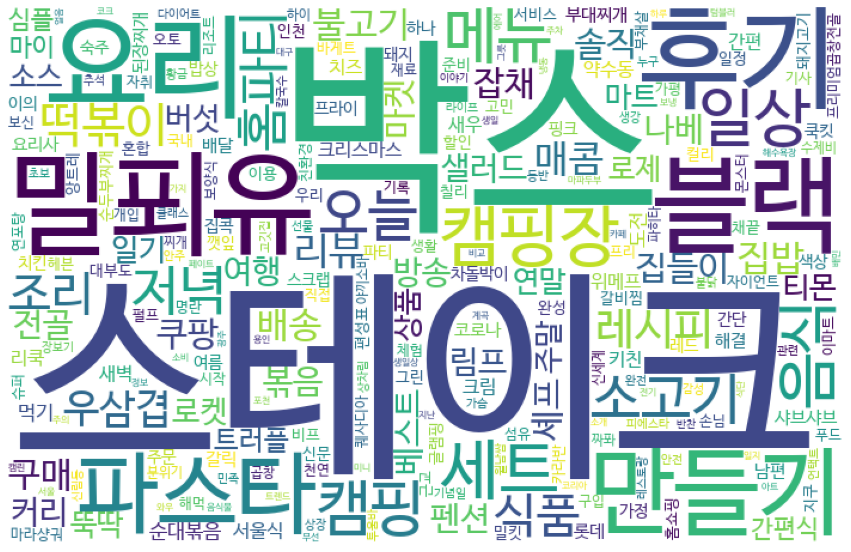

<Figure size 432x288 with 0 Axes>

In [503]:
wordcloud = WordCloud(font_path=path,
                     background_color='white',
                     max_words = 250,
                     relative_scaling=0.3,
                     width=700,
                     height=450
                     ).generate_from_frequencies(dict(vocab))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.savefig('../images/wordcloud_naver.png')